In [41]:
from PIL import Image, ImageEnhance, ImageFilter
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline

In [42]:
def contrast(img, factor):
    im = img.copy()
    contraster = ImageEnhance.Contrast(im)
    im = contraster.enhance(factor)
    return im

In [43]:
def brightness(img, factor):
    im = image.copy()
    enhancer = ImageEnhance.Brightness(im)
    im = enhancer.enhance(factor)
    return im

In [44]:
def sharpen(img, factor):
    im = img.copy()
    im.filter(ImageFilter.SHARPEN)
    return im

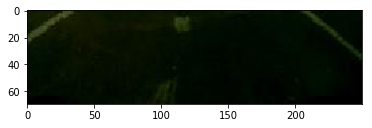

In [53]:
image = Image.open('test1.jpg', 'r')
res = brightness(res, 8)
imshow(np.asarray(image))